First few rows of the dataset:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 ent

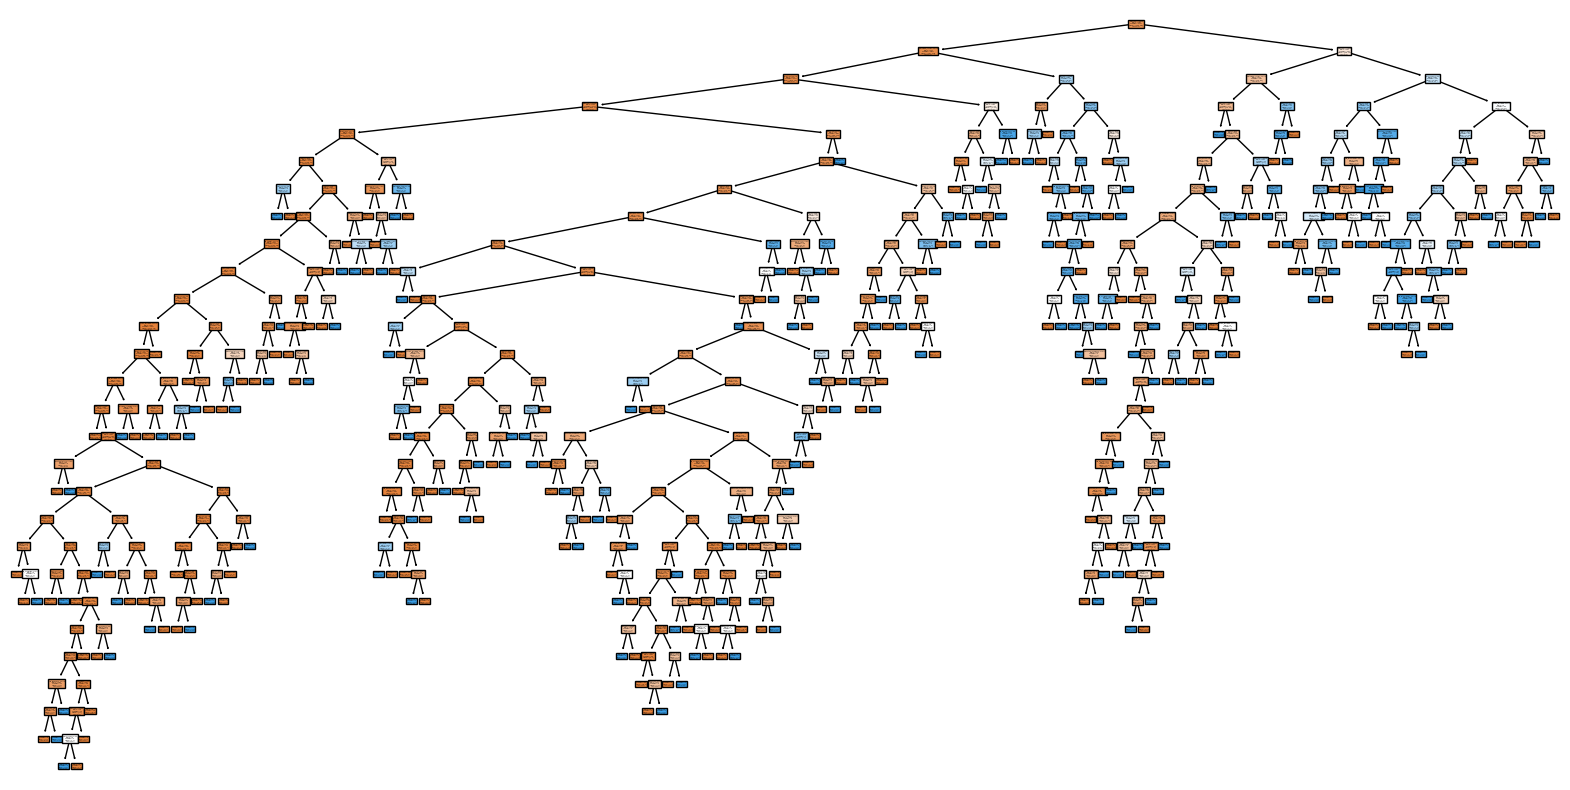

In [1]:
# Step 1: Load and Explore the Dataset

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
import joblib
import json

# Load the dataset from the local file
data = pd.read_csv('bank+marketing/bank/bank.csv', sep=';')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(data.info())

# Step 2: Preprocess the Data

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# There should be no missing values in this dataset according to its description
# However, we should still check for any unexpected missing values
data['contact'].fillna('unknown', inplace=True)

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target variable
X = data_encoded.drop('y_yes', axis=1)
y = data_encoded['y_yes']

# Step 3: Split the Data into Training and Testing Sets

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train a Decision Tree Classifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Step 5: Evaluate the Model

# Predict the target variable on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Step 6: Visualize the Decision Tree

# Convert feature names to a list
feature_names = X.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=feature_names, class_names=['No', 'Yes'], filled=True)
plt.show()

# Step 7: Save the Model and Results

# Save the model
joblib.dump(dt_classifier, 'decision_tree_model.pkl')

# Save the results
results = {
    'confusion_matrix': confusion_matrix(y_test, y_pred).tolist(),
    'classification_report': classification_report(y_test, y_pred, output_dict=True),
    'accuracy_score': accuracy_score(y_test, y_pred)
}

# Save results to a JSON file
with open('model_results.json', 'w') as f:
    json.dump(results, f)

    

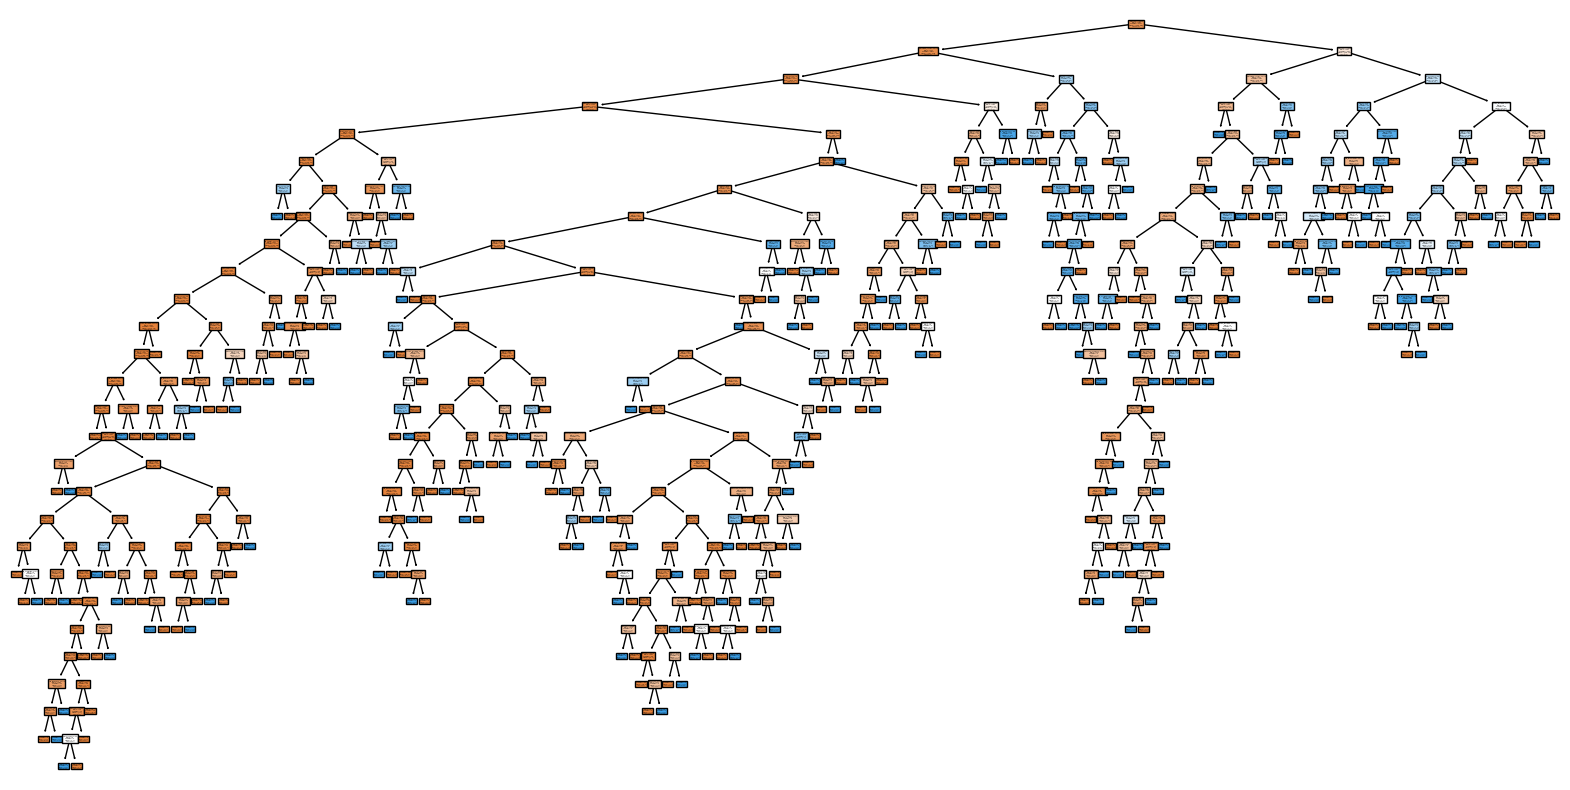

In [9]:
# Convert feature names to a list
feature_names = X.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=feature_names, class_names=['No', 'Yes'], filled=True)
plt.show()


In [10]:
confusion_matrix(y_test,y_pred)

array([[1113,   92],
       [  85,   67]], dtype=int64)

In [2]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
